In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# convert to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# convert the string representation of list to actual list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: title={'center': 'Job Work From Home Status'}>

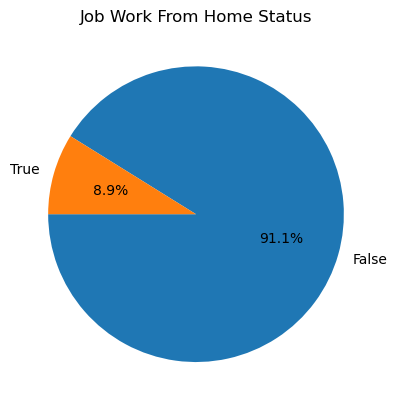

In [12]:
df['job_work_from_home'].value_counts().plot(kind='pie', ylabel='', title='Job Work From Home Status', startangle=180, autopct='%1.1f%%')

<Axes: title={'center': 'Job Title'}>

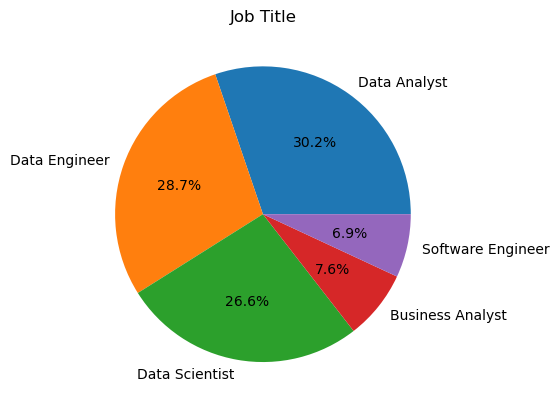

In [10]:
df['job_title_short'].value_counts().head(5).plot(kind='pie', ylabel='', title='Job Title', autopct='%1.1f%%')

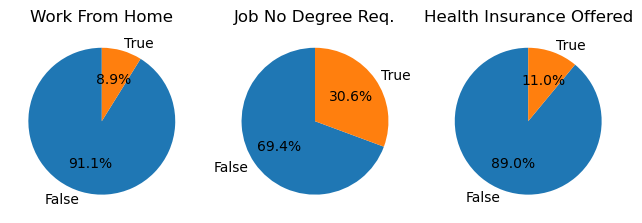

In [22]:
fig, ax = plt.subplots(1, 3)

# column_names = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']

# for i, col in enumerate(column_names):
#   df_plot = df[col].value_counts()
#   df_plot.plot(kind='pie', ylabel='', title=col.replace('_', ' ').title(), autopct='%1.1f%%', ax=ax[i])

dict_col = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job No Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (col, title) in enumerate(dict_col.items()):
  ax[i].pie(df[col].value_counts(), autopct='%1.1f%%', startangle=90, labels=df[col].value_counts().index)
  ax[i].set_title(title)
  
fig.tight_layout()